In [1]:
import pandas as pd
import datetime
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# US data into dataframe
df = pd.read_csv('./output/USvideos.csv') 
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [3]:
# Remove unecessary columns
df = df.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled'], axis=1)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...


In [4]:
# Reformate published date
df['publish_time'] = df['publish_time'].apply(lambda x: x[2:10])
df['publish_time'] = df['publish_time'].apply(lambda x: str(x).replace('-', '.'))
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17.11.13,SHANtell martin,748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,17.11.13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,17.11.12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,17.11.13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,17.11.12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...


In [5]:
# Reformat trending date
df['trending_date'] = df['trending_date'].apply(lambda x: datetime.datetime.strptime(str(x), '%y.%d.%m').strftime('%y.%m.%d'))
df['trending_date']

0        17.11.14
1        17.11.14
2        17.11.14
3        17.11.14
4        17.11.14
           ...   
40944    18.06.14
40945    18.06.14
40946    18.06.14
40947    18.06.14
40948    18.06.14
Name: trending_date, Length: 40949, dtype: object

In [6]:
# Split tags
df['tags'] = df['tags'].apply(lambda x: str(x).split('|'))
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description
0,2kyS6SvSYSE,17.11.14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17.11.13,[SHANtell martin],748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.11.14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,17.11.13,"[last week tonight trump presidency, ""last wee...",2418783,97185,6146,12703,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.11.14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,17.11.12,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.11.14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,17.11.13,"[rhett and link, ""gmm"", ""good mythical morning...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.11.14,I Dare You: GOING BALD!?,nigahiga,24,17.11.12,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.06.14,The Cat Who Caught the Laser,AaronsAnimals,15,18.05.18,"[aarons animals, ""aarons"", ""animals"", ""cat"", ""...",1685609,38160,1385,2657,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.06.14,True Facts : Ant Mutualism,zefrank1,22,18.05.18,[[none]],1064798,60008,382,3936,False,NaN
40946,D6Oy4LfoqsU,18.06.14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,18.05.18,[I gave safiya nygaard a perfect hair makeover...,1066451,48068,1032,3992,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.06.14,How Black Panther Should Have Ended,How It Should Have Ended,1,18.05.17,"[Black Panther, ""HISHE"", ""Marvel"", ""Infinity W...",5660813,192957,2846,13088,False,How Black Panther Should Have EndedWatch More ...


In [7]:
# Get category by number
cat_dict = {}

with open('./output/US_category_id.json') as f:
    data = json.loads(f.read())
    for i in range(0, 32):
        cat_dict[data['items'][i]['id']] = data['items'][i]['snippet']['title']
    
    
 
# for i in range(0, 32):
cat_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [8]:
# Convert category number to category name
df['category_id'] = df['category_id'].apply(lambda x: cat_dict[str(x)])
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,description
0,2kyS6SvSYSE,17.11.14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,17.11.13,[SHANtell martin],748374,57527,2966,15954,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.11.14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,17.11.13,"[last week tonight trump presidency, ""last wee...",2418783,97185,6146,12703,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.11.14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,17.11.12,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",3191434,146033,5339,8181,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.11.14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,17.11.13,"[rhett and link, ""gmm"", ""good mythical morning...",343168,10172,666,2146,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.11.14,I Dare You: GOING BALD!?,nigahiga,Entertainment,17.11.12,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",2095731,132235,1989,17518,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.06.14,The Cat Who Caught the Laser,AaronsAnimals,Pets & Animals,18.05.18,"[aarons animals, ""aarons"", ""animals"", ""cat"", ""...",1685609,38160,1385,2657,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.06.14,True Facts : Ant Mutualism,zefrank1,People & Blogs,18.05.18,[[none]],1064798,60008,382,3936,False,NaN
40946,D6Oy4LfoqsU,18.06.14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,Entertainment,18.05.18,[I gave safiya nygaard a perfect hair makeover...,1066451,48068,1032,3992,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.06.14,How Black Panther Should Have Ended,How It Should Have Ended,Film & Animation,18.05.17,"[Black Panther, ""HISHE"", ""Marvel"", ""Infinity W...",5660813,192957,2846,13088,False,How Black Panther Should Have EndedWatch More ...


In [9]:
len(df['channel_title'].unique())

2207

In [10]:
# convert back to csv
df.to_csv('./output/US_cleaned_data_2018')

In [11]:
# create new column showing length
df["Name Length"] = df["title"].str.len()

In [12]:
nameLengthMean = df["Name Length"].mean()

In [13]:
# Average name length for all trending videos
print(nameLengthMean)

48.578182617402135


In [14]:
# Average name length for each category
valueList = []
lengthList = []
unique_categories = df['category_id'].unique()
for value in unique_categories:
    my_list = df.groupby('category_id').get_group(value)
    nameLength = my_list["title"].str.len().mean()
    print(value)
    valueList.append(value)
    print(nameLength)
    lengthList.append(nameLength)
    print('\n')

People & Blogs
42.45109034267913


Entertainment
52.599156965074265


Comedy
41.33063349725195


Science & Technology
39.31361932528113


Film & Animation
47.345842217484005


News & Politics
58.93285082428629


Sports
59.905703771849126


Music
45.823238566131025


Pets & Animals
43.61304347826087


Education
43.082729468599034


Howto & Style
50.539797395079596


Autos & Vehicles
51.161458333333336


Travel & Events
57.28606965174129


Gaming
46.35985312117503


Nonprofits & Activism
45.59649122807018


Shows
53.29824561403509




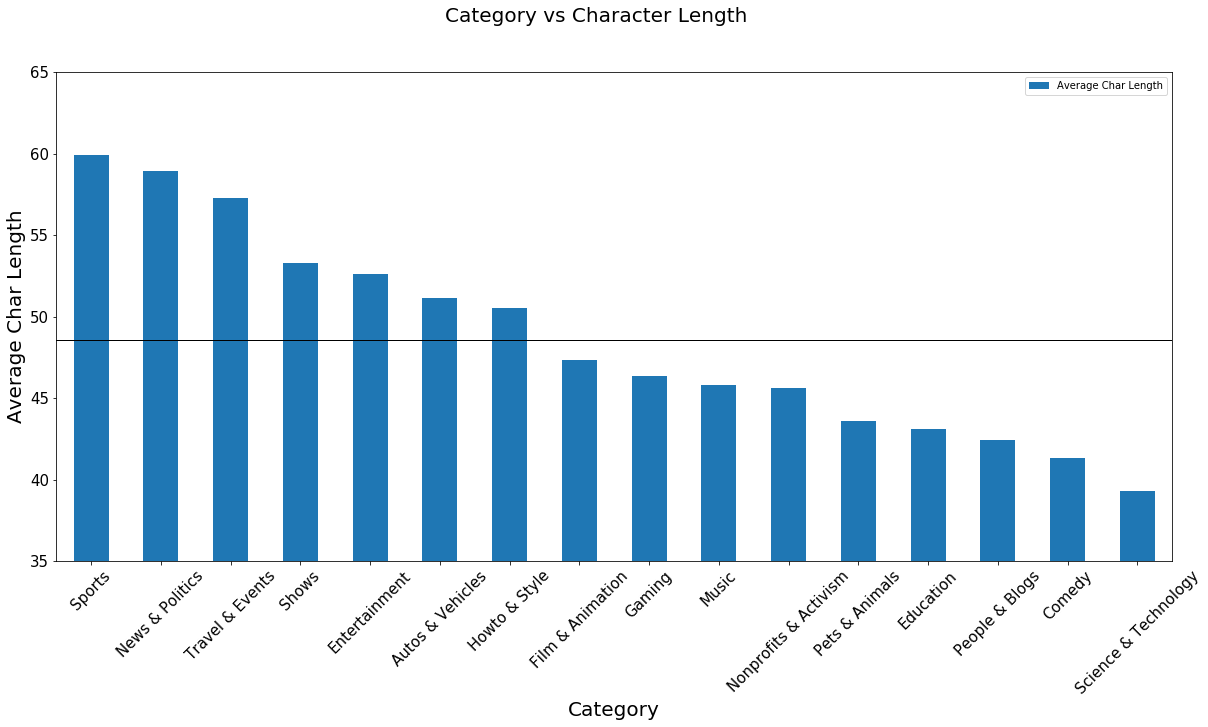

In [15]:
df2 = pd.DataFrame({'Average Char Length': lengthList, 
                   }, index=valueList)
df2 = df2.sort_values(by='Average Char Length', ascending=False)
ax = df2.plot.bar(figsize=(20,9))
plt.suptitle('Category vs Character Length', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
ax.set_xlabel("Category", fontsize=20)
ax.set_ylabel("Average Char Length", fontsize=20)
axes = plt.gca()
axes.set_ylim([35,65])
plt.axhline(y=nameLengthMean,linewidth=1, color='k')



In [16]:
# Use this to filter out junk words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ChrisJiang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stop_words = stopwords.words('english')

In [18]:
capital_stop_words = stop_words

In [19]:
capital_stop_words = [x.upper() for x in capital_stop_words] 

In [20]:
stop_words.append("&")
stop_words.append("-")
stop_words.append("|")
stop_words.append("//")
stop_words.append("–")
stop_words.append("—   ")
stop_words.append("—")
#random junk found in shows most common
stop_words.append("'a")
stop_words.append("'a")
stop_words.append("(")
stop_words.append(")")



In [21]:
capital_stop_words.append("&")
capital_stop_words.append("-")
capital_stop_words.append("|")
capital_stop_words.append("//")
capital_stop_words.append("–")
capital_stop_words.append("—   ")
capital_stop_words.append("—")
#random junk found in shows most common
capital_stop_words.append("'a")

In [22]:
df['Lowercase Title'] = df['title'].str.lower() 

In [23]:
df["Filtered Title"] = df['Lowercase Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [24]:
df['Filtered Title'] = df['Filtered Title'].map(lambda x: x.replace('[','').replace(']','').replace("(",'').replace(")",''))

In [25]:
# Finds most common words out of all the trending videos  
pd.Series(' '.join(df['Filtered Title']).lower().split()).value_counts()[:10]

official    3930
video       2820
2018        2094
trailer     1997
ft.         1206
new          940
audio        834
makeup       815
hd           793
music        781
dtype: int64

In [26]:
wordList = ['official','video','2018','trailer','ft.','new','audio','makeup','hd','2017']

In [27]:
numberList = [3920,2820,2094,1997,1206,940,834,815,793,781]

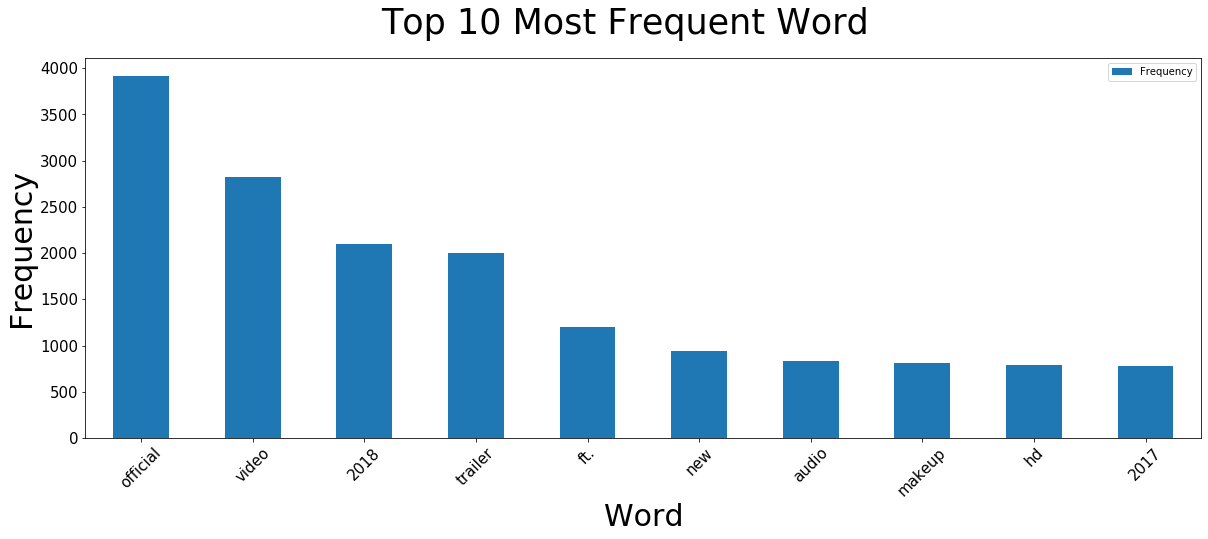

In [37]:
df3 = pd.DataFrame({'Frequency': numberList, 
                   }, index=wordList)
df3 = df3.sort_values(by='Frequency', ascending=False)
ax = df3.plot.bar(figsize=(20,7))
plt.suptitle('Top 10 Most Frequent Word', fontsize=35)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
ax.set_xlabel("Word", fontsize=30)
ax.set_ylabel("Frequency", fontsize=30)
axes = plt.gca()



In [29]:
# Extract all capital words in title
df['Capital Extraction']=df['title']
L = []
import re
for x in df['Capital Extraction']:
    matches = re.findall(r"([A-Z]+\s?[A-Z]+[^a-z0-9\W])",x)
    str1 = ' '.join(matches)
    #print(str1)
    L.append(str1)
df['Capital Extraction'] = L

In [30]:
# Filter out capital stop words 
df["Capital Filtered Title"] = df['Capital Extraction'].apply(lambda x: ' '.join([word for word in x.split() if word not in (capital_stop_words)]))

In [31]:
# Get rid of these brackets for filtering
df['Filtered Title'] = df['Filtered Title'].map(lambda x: x.replace('[','').replace(']','').replace("(",'').replace(")",''))

In [32]:
df['Capital Filtered Title'] = df['Capital Filtered Title'].map(lambda x: x.replace('[','').replace(']','').replace("(",'').replace(")",''))

In [33]:
gk = df.groupby('category_id')

In [34]:
# Get most frequent words in each category as well as the average length for each
valueList2 = []
for value in unique_categories:
    my_list = df.groupby('category_id').get_group(value)
    print(value)
    print(pd.Series(' '.join(my_list['Filtered Title']).lower().split()).value_counts()[:10])
    print('\n')



People & Blogs
2018      113
vs.       109
new        95
2017       93
first      92
doctor     88
day        87
real       86
full       83
helbig     81
dtype: int64


Entertainment
trailer     983
official    926
2018        630
hd          502
season      345
star        278
2           245
react       234
black       228
movie       221
dtype: int64


Comedy
conan       139
hannah      128
ever        126
every       112
kevin       111
stocking    106
bad         103
tbs         103
show         99
video        98
dtype: int64


Science & Technology
iphone     94
test       77
gadgets    73
tech       71
new        67
google     67
x          67
falcon     66
apple      66
heavy      66
dtype: int64


Film & Animation
trailer     723
official    563
2018        365
hd          264
trailers    258
teaser      251
movie       216
honest      190
film        140
2           123
dtype: int64


News & Politics
news        215
nbc         106
today       102
volcano     101
time       

In [35]:
# Most frequent capital words in each genre
for value in unique_categories:
    my_list = df.groupby('category_id').get_group(value)
    print(value)
    print(pd.Series(' '.join(my_list['Capital Filtered Title']).lower().split()).value_counts()[:10])
    print('\n')

People & Blogs
tbs          63
real         39
knock        38
challenge    38
time         36
first        33
diy          32
ever         32
bts          30
dad          28
dtype: int64


Entertainment
react        203
snl          191
diy          152
challenge    123
wired        103
bts          100
wwhl          95
makeup        90
abc           76
kids          68
dtype: int64


Comedy
conan    114
tbs      103
every     97
ever      97
yiay      90
giant     33
new       26
talk      26
best      24
nfl       22
dtype: int64


Science & Technology
wired        46
science      32
prototype    30
ultimate     30
psi          28
got          27
graphics     27
card         27
intel        27
diy          21
dtype: int64


Film & Animation
hbo       101
fox        98
ifc        26
lied       23
lost       19
shorts     18
scam       17
lego       17
hd         15
k          13
dtype: int64


News & Politics
today    109
nbc      106
bbc       85
time      80
msnbc     43
cnbc      